In [77]:
import pandas as pd
import matplotlib.pyplot as plt

## Question 1:
How many items are there to choose from?
**Answer**: 4990

In [78]:
df_candid=pd.read_csv("data/candidate_items.csv")
df_candid.nunique()

item_id    4990
dtype: int64

## Question 2:
What is the most commen item people have bought after a session?

In [79]:
df_purchases=pd.read_csv("data/train_purchases.csv")
a=df_purchases.groupby("item_id").count().sort_values(by="session_id",ascending=False)
a["rel"]=a["session_id"]/a["session_id"].sum()
a["cumsum"]=a["rel"].cumsum()
a

,session_id,date,rel,cumsum
item_id,,,,
8060,8451,8451,0.008451,0.008451
26853,3829,3829,0.003829,0.012280
19882,3355,3355,0.003355,0.015635
8622,2745,2745,0.002745,0.018380
2447,2726,2726,0.002726,0.021106
...,...,...,...,...
11241,1,1,0.000001,0.999996
20043,1,1,0.000001,0.999997
25471,1,1,0.000001,0.999998


In [80]:
#NUM
NUM=20
def plot_purchases_count(NUM):
    x=range(NUM)
    y=a.iloc[:NUM,0]
    label=y.index.values
    if NUM<50:
        p=plt.bar(x,a.iloc[:NUM,0])
        p=plt.xticks(x,labels=label,rotation=60)
        p=plt.xlabel("item_id")
        p=plt.ylabel("Purchases Count")
    else:
        p=plt.plot(x,a.iloc[:NUM,0])
        p=plt.xlabel("item_id")
        p=plt.ylabel("Purchases Count")
        p=plt.xticks(x[::int(NUM/10)],labels=label[::int(NUM/10)],rotation=60)



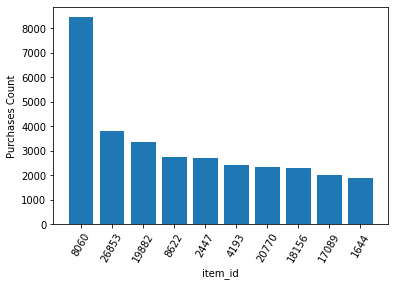

In [81]:
plot_purchases_count(10)

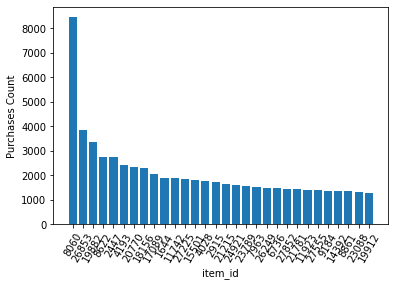

In [82]:
plot_purchases_count(30)

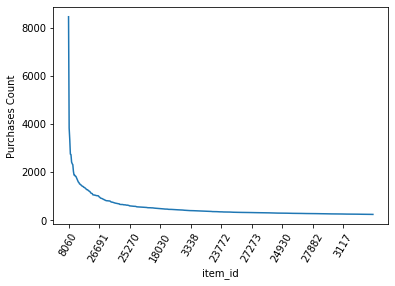

In [83]:
plot_purchases_count(500)

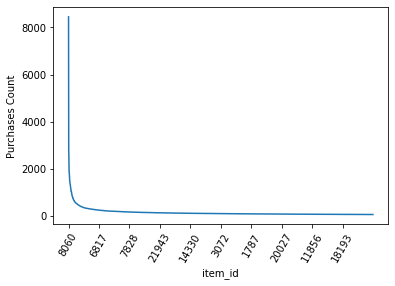

In [84]:
plot_purchases_count(4990)

## Conclusion:
There are only a few popular items. If we would only recommend them we would not have a bad recommender. Most of the items are bought very rarely.

In [85]:
#Another Way to make this visible
b=len(a[a["cumsum"]<=0.80])
a[a["cumsum"]<=0.80]

,session_id,date,rel,cumsum
item_id,,,,
8060,8451,8451,0.008451,0.008451
26853,3829,3829,0.003829,0.012280
19882,3355,3355,0.003355,0.015635
8622,2745,2745,0.002745,0.018380
2447,2726,2726,0.002726,0.021106
...,...,...,...,...
26773,46,46,0.000046,0.799812
10068,46,46,0.000046,0.799858
3648,46,46,0.000046,0.799904


In [86]:
print("Mit " + str(b*100/len(a)) + "% der items werden 80% der sesseions erklärt")

Mit 33.49024170941979% der items werden 80% der sesseions erklärt
